# dbrain
Extract the lateral ventricle from an MRI image of the brain.

## Description

This procedure extracts the lateral ventricle from an MRI image of the brain. This example was kindly provided by Prof. John Goutsias from The Johns Hopkins University and appears in Goutsias and S. Batman, Morphological Methods for Biomedical Image Analysis, In the Handbook of Medical Imaging: Volume 3. Progress in Medical Image Processing and Analysis, J. M. Fitzpatrick and M. Sonka (Eds.)(To Appear). SPIE Optical Engineering Press, May 2000. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia


# Reading
The MRI image of a brain slice is read. 

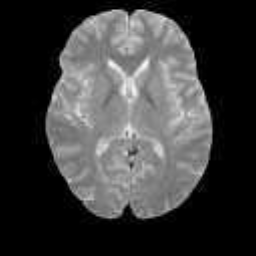

In [3]:
a_pil = Image.open('data/mribrain.tif')
a_pil

## Ventricle detection I
The ventricle is enhanced using an opening with a disk of radius 10 followed by a reconstruction. 

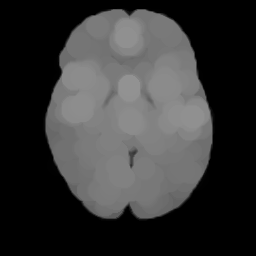

In [5]:
a = np.array(a_pil)
b = ia.iaopen(a,ia.iasedisk(10));
c = ia.iainfrec(b,a);
Image.fromarray(ia.iagshow(b).transpose(1, 2, 0))

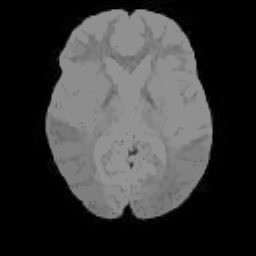

In [6]:
Image.fromarray(ia.iagshow(c).transpose(1, 2, 0))

# Ventricle detection II
The result of the open by reconstruction is subtracted from the original image. Note that the three operations: open, reconstruction and the subtraction could be done at once using the mmopenrecth (open by reconstruction top-hat) function. On the right, the enhanced ventricle is thresholded. 

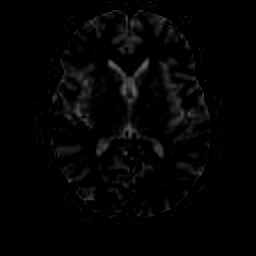

In [7]:
d = ia.iasubm(a,c);
Image.fromarray(ia.iagshow(d).transpose(1, 2, 0))

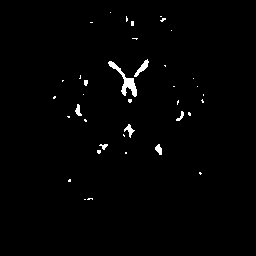

In [8]:
e = ia.iathreshad(d, 50)
Image.fromarray(ia.iagshow(e).transpose(1, 2, 0))

# Selecting the ventricle
Finally, the ventricle is selected as the connected object with area larger than 70 pixels. 
For visualization purposes, the result of the segmentation is overlayed on the original brain image. 

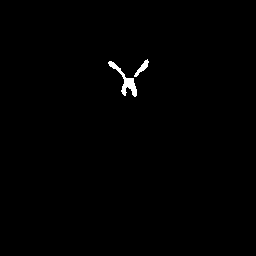

In [9]:
f= ia.iaareaopen(e,70);
Image.fromarray(ia.iagshow(f).transpose(1, 2, 0))

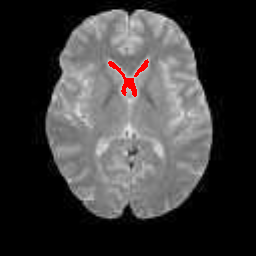

In [10]:
Image.fromarray(ia.iagshow(a, f).transpose(1, 2, 0))